In [1]:
import sys;print(sys.executable)

import imageio
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline
plt.style.use('seaborn-white')

/home/krzysztof/Documents/Studia/Master_thesis/05_Baseline_model_NYU/.env/breast_cancer_classifier_env/bin/python3.6


In [2]:
metadata_path = "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_for_whole_cases/metadata_for_whole_images_v2.csv"
metadata = pd.read_csv(metadata_path)
image_folder = "/media/krzysztof/ADATA_HD700/Breast_cancer_PNG/CBIS-DDSM"

# Sample images

## Benign/ malignant cases (whole breasts)

In [4]:
benign_img = metadata[metadata["pathology"]==1]["image file path"].sample(6)

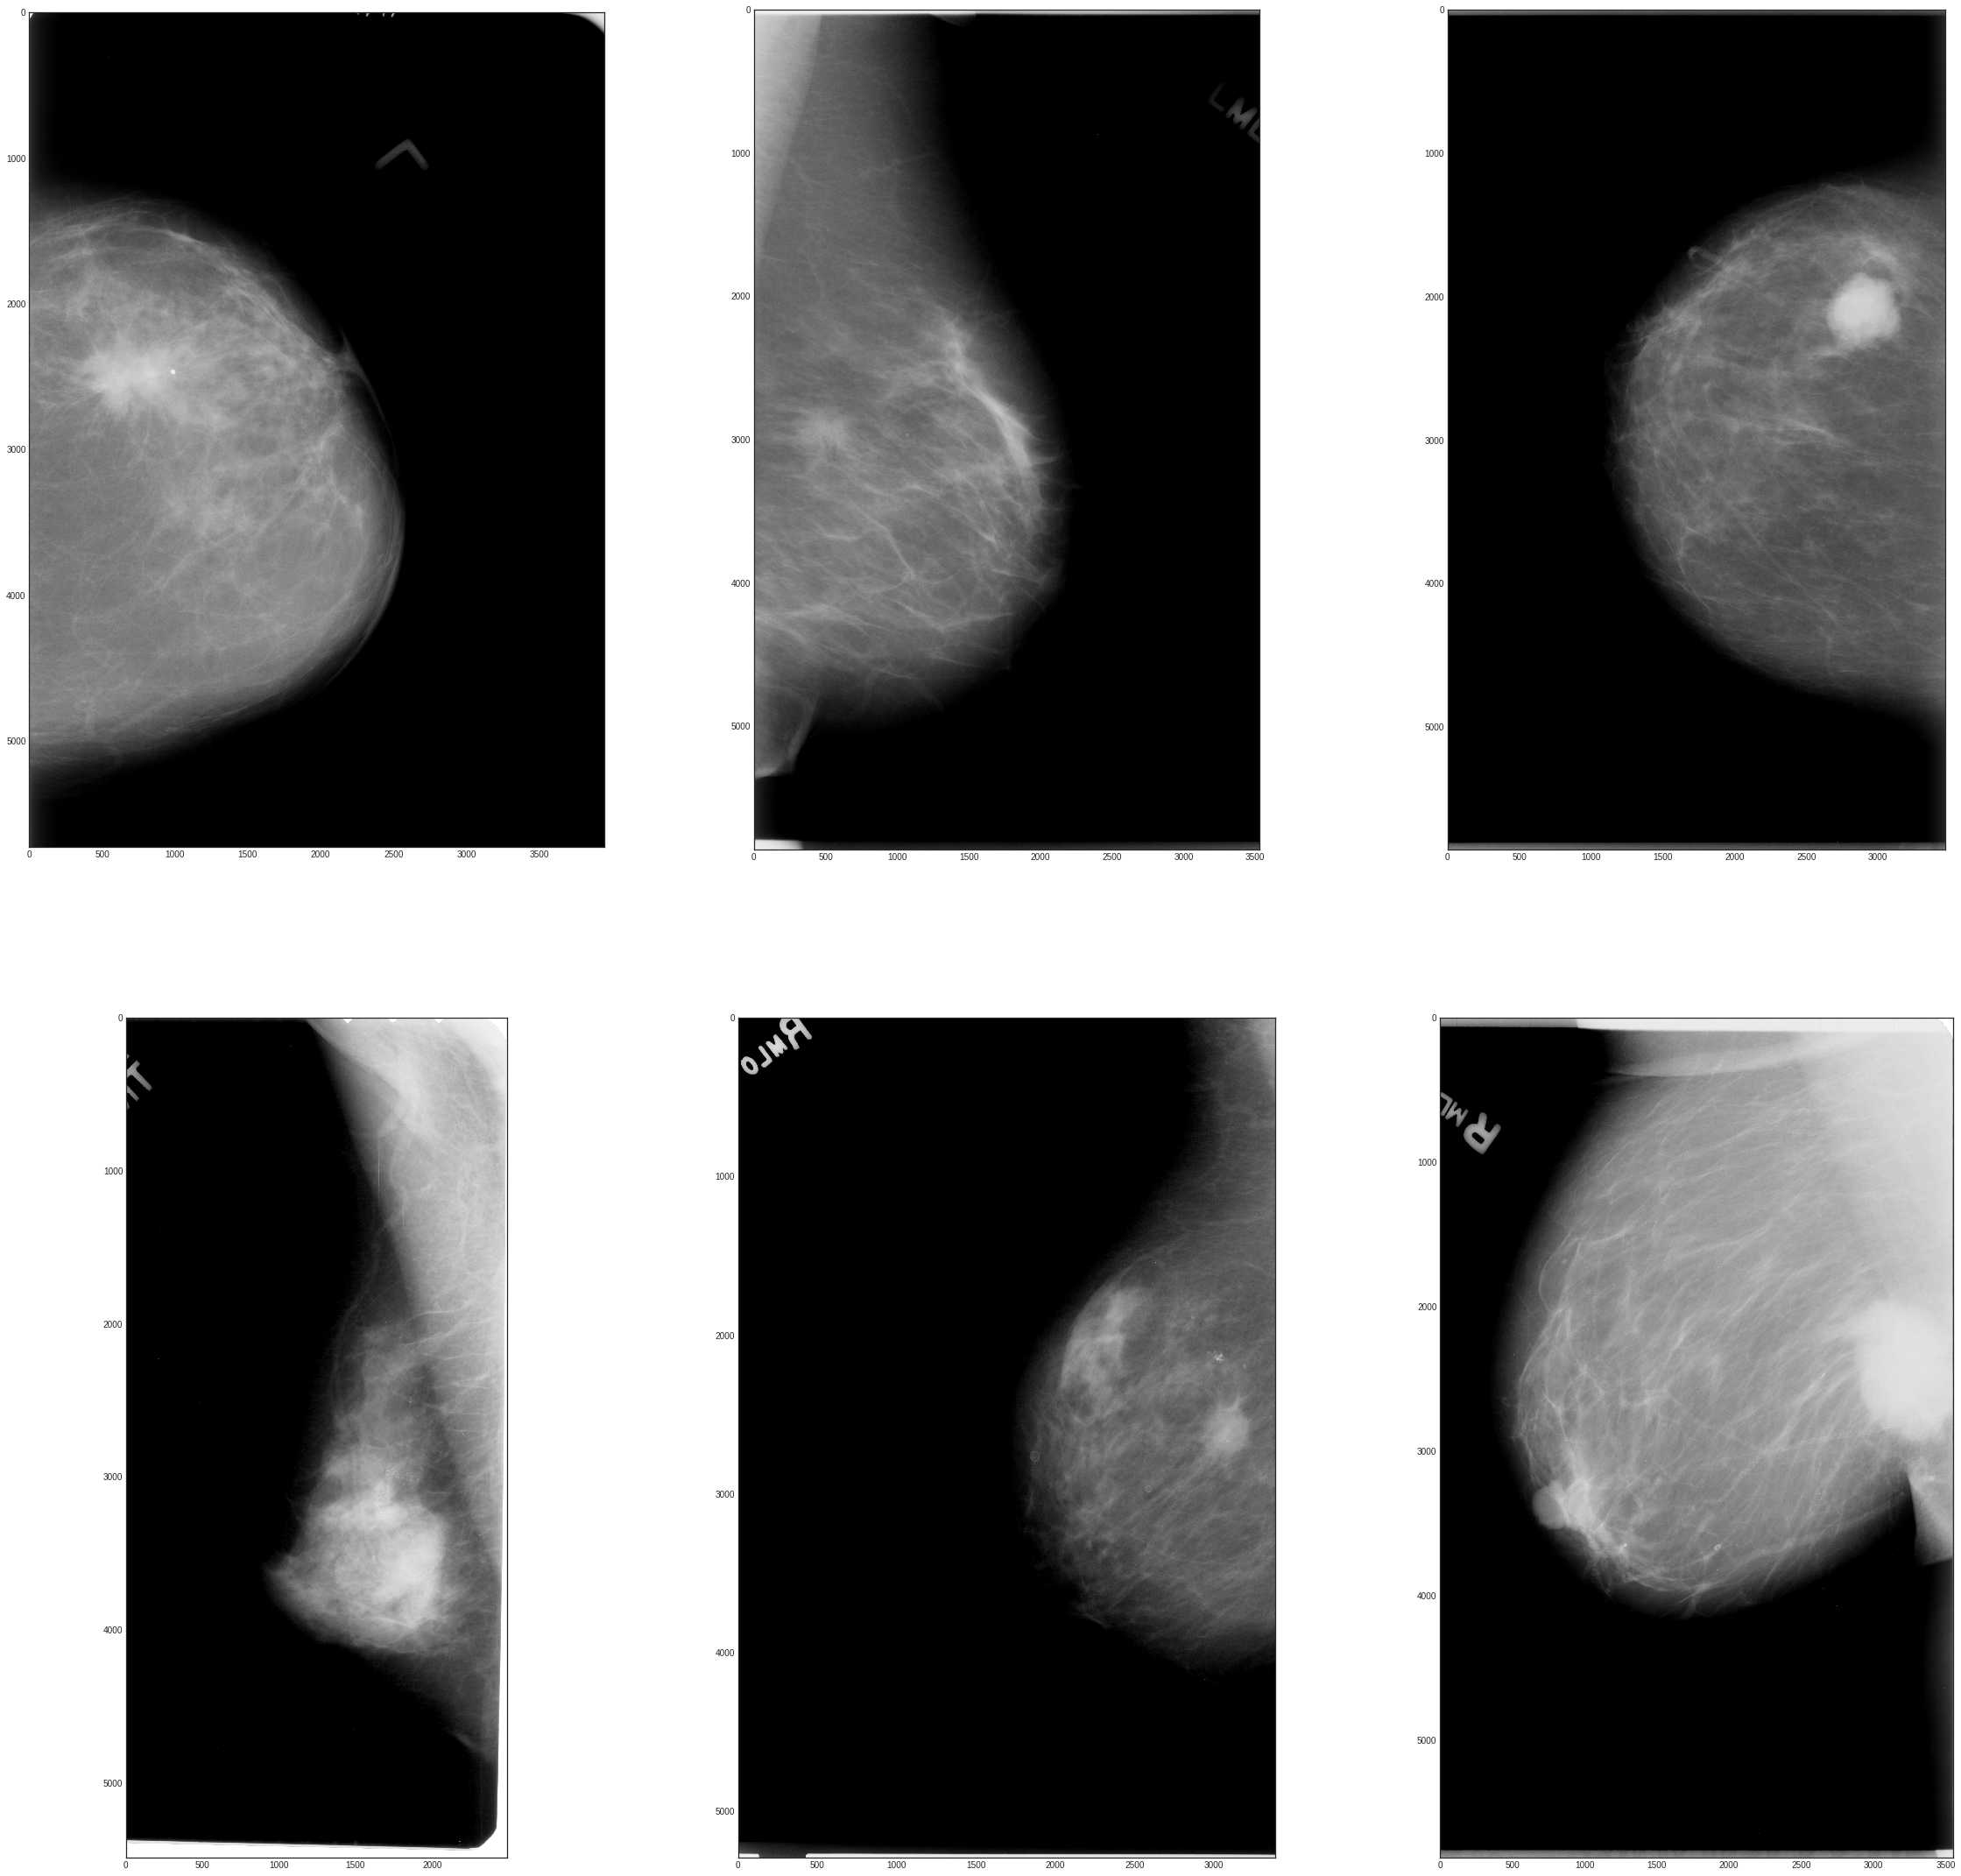

In [5]:
benign_img = list(benign_img)
plt.figure(figsize=(40, 60))
columns = 3
for i, b in enumerate(benign_img):
    plt.subplot(len(benign_img)/columns+1, columns, i + 1)
    plt.imshow(imageio.imread(os.path.join(image_folder, b)), cmap="gray")

## Benign/ malignant cases (findings)

In [6]:
mass_train_path = "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels/mass_case_description_train_set.csv"
mass_test_path = "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels/mass_case_description_test_set.csv"
calc_train_path = "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels/calc_case_description_train_set.csv"
calc_test_path = "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels/calc_case_description_test_set.csv"

mass_train = pd.read_csv(mass_train_path)
mass_test = pd.read_csv(mass_test_path)
mass_all = pd.concat([mass_train, mass_test])

calc_train = pd.read_csv(calc_train_path)
calc_test = pd.read_csv(calc_test_path)
calc_all = pd.concat([calc_train, calc_test])

all_cases = pd.concat([mass_all, calc_all])

/home/krzysztof/Documents/Studia/Master_thesis/05_Baseline_model_NYU/.env/breast_cancer_classifier_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
benign_findings = all_cases[all_cases["pathology"]=="MALIGNANT"].sample(1)

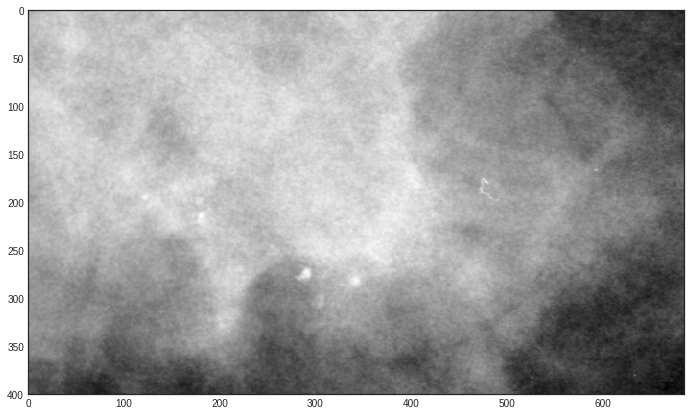

In [8]:
benign_findings = all_cases[all_cases["pathology"]=="BENIGN"].sample(1)
plt.figure(figsize=(40, 40))
columns = 3
i = 0
for _, b in benign_findings.iterrows():
    cropped_path = b["cropped image file path"]
    
    plt.subplot(len(benign_img)/columns+1, columns, i + 1)
    plt.imshow(imageio.imread(cropped_path), cmap="gray")
    i+=1

## Images with masks

In [3]:
metadata_with_masks_path = [
    "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_with_masks/test_set_with_masks.csv",
    "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_with_masks/train_set_with_masks.csv",
    "/home/krzysztof/Documents/Studia/Master_thesis/02_Source_code/breast-cancer-research/data/labels_with_masks/validation_set_with_masks.csv"
]

In [4]:
metadata_with_masks = []
for m in metadata_with_masks_path:
    metadata_with_masks.append(pd.read_csv(m))

In [5]:
all_metadata_with_masks = pd.concat(metadata_with_masks)

In [12]:
sample_cases_malignant = all_metadata_with_masks[all_metadata_with_masks["pathology"]==1].sample(6)
sample_cases_benign = all_metadata_with_masks[all_metadata_with_masks["pathology"]==0].sample(6)

In [13]:
sample_cases_malignant

,Unnamed: 0,patient_id,image view,left or right breast,subtlety,pathology,breast_density,image file path,ROI benign path,ROI malignant path
1139,1168,P_01302,MLO,RIGHT,5,1,2,Mass-Training_P_01302_RIGHT_MLO/full_image.png,Mass-Training_P_01302_RIGHT_MLO/full_mask_beni...,Mass-Training_P_01302_RIGHT_MLO/full_mask_mali...
272,286,P_00950,CC,LEFT,5,1,3,Mass-Training_P_00950_LEFT_CC/full_image.png,Mass-Training_P_00950_LEFT_CC/full_mask_benign...,Mass-Training_P_00950_LEFT_CC/full_mask_malign...
384,399,P_01297,MLO,LEFT,3,1,4,Calc-Training_P_01297_LEFT_MLO/full_image.png,Calc-Training_P_01297_LEFT_MLO/full_mask_benig...,Calc-Training_P_01297_LEFT_MLO/full_mask_malig...
1446,1481,P_01671,MLO,LEFT,5,1,2,Mass-Training_P_01671_LEFT_MLO/full_image.png,Mass-Training_P_01671_LEFT_MLO/full_mask_benig...,Mass-Training_P_01671_LEFT_MLO/full_mask_malig...
535,545,P_01600,CC,RIGHT,5,1,2,Mass-Training_P_01600_RIGHT_CC/full_image.png,Mass-Training_P_01600_RIGHT_CC/full_mask_benig...,Mass-Training_P_01600_RIGHT_CC/full_mask_malig...
49,49,P_00095,CC,LEFT,5,1,2,Mass-Training_P_00095_LEFT_CC/full_image.png,Mass-Training_P_00095_LEFT_CC/full_mask_benign...,Mass-Training_P_00095_LEFT_CC/full_mask_malign...


### Black/white mask

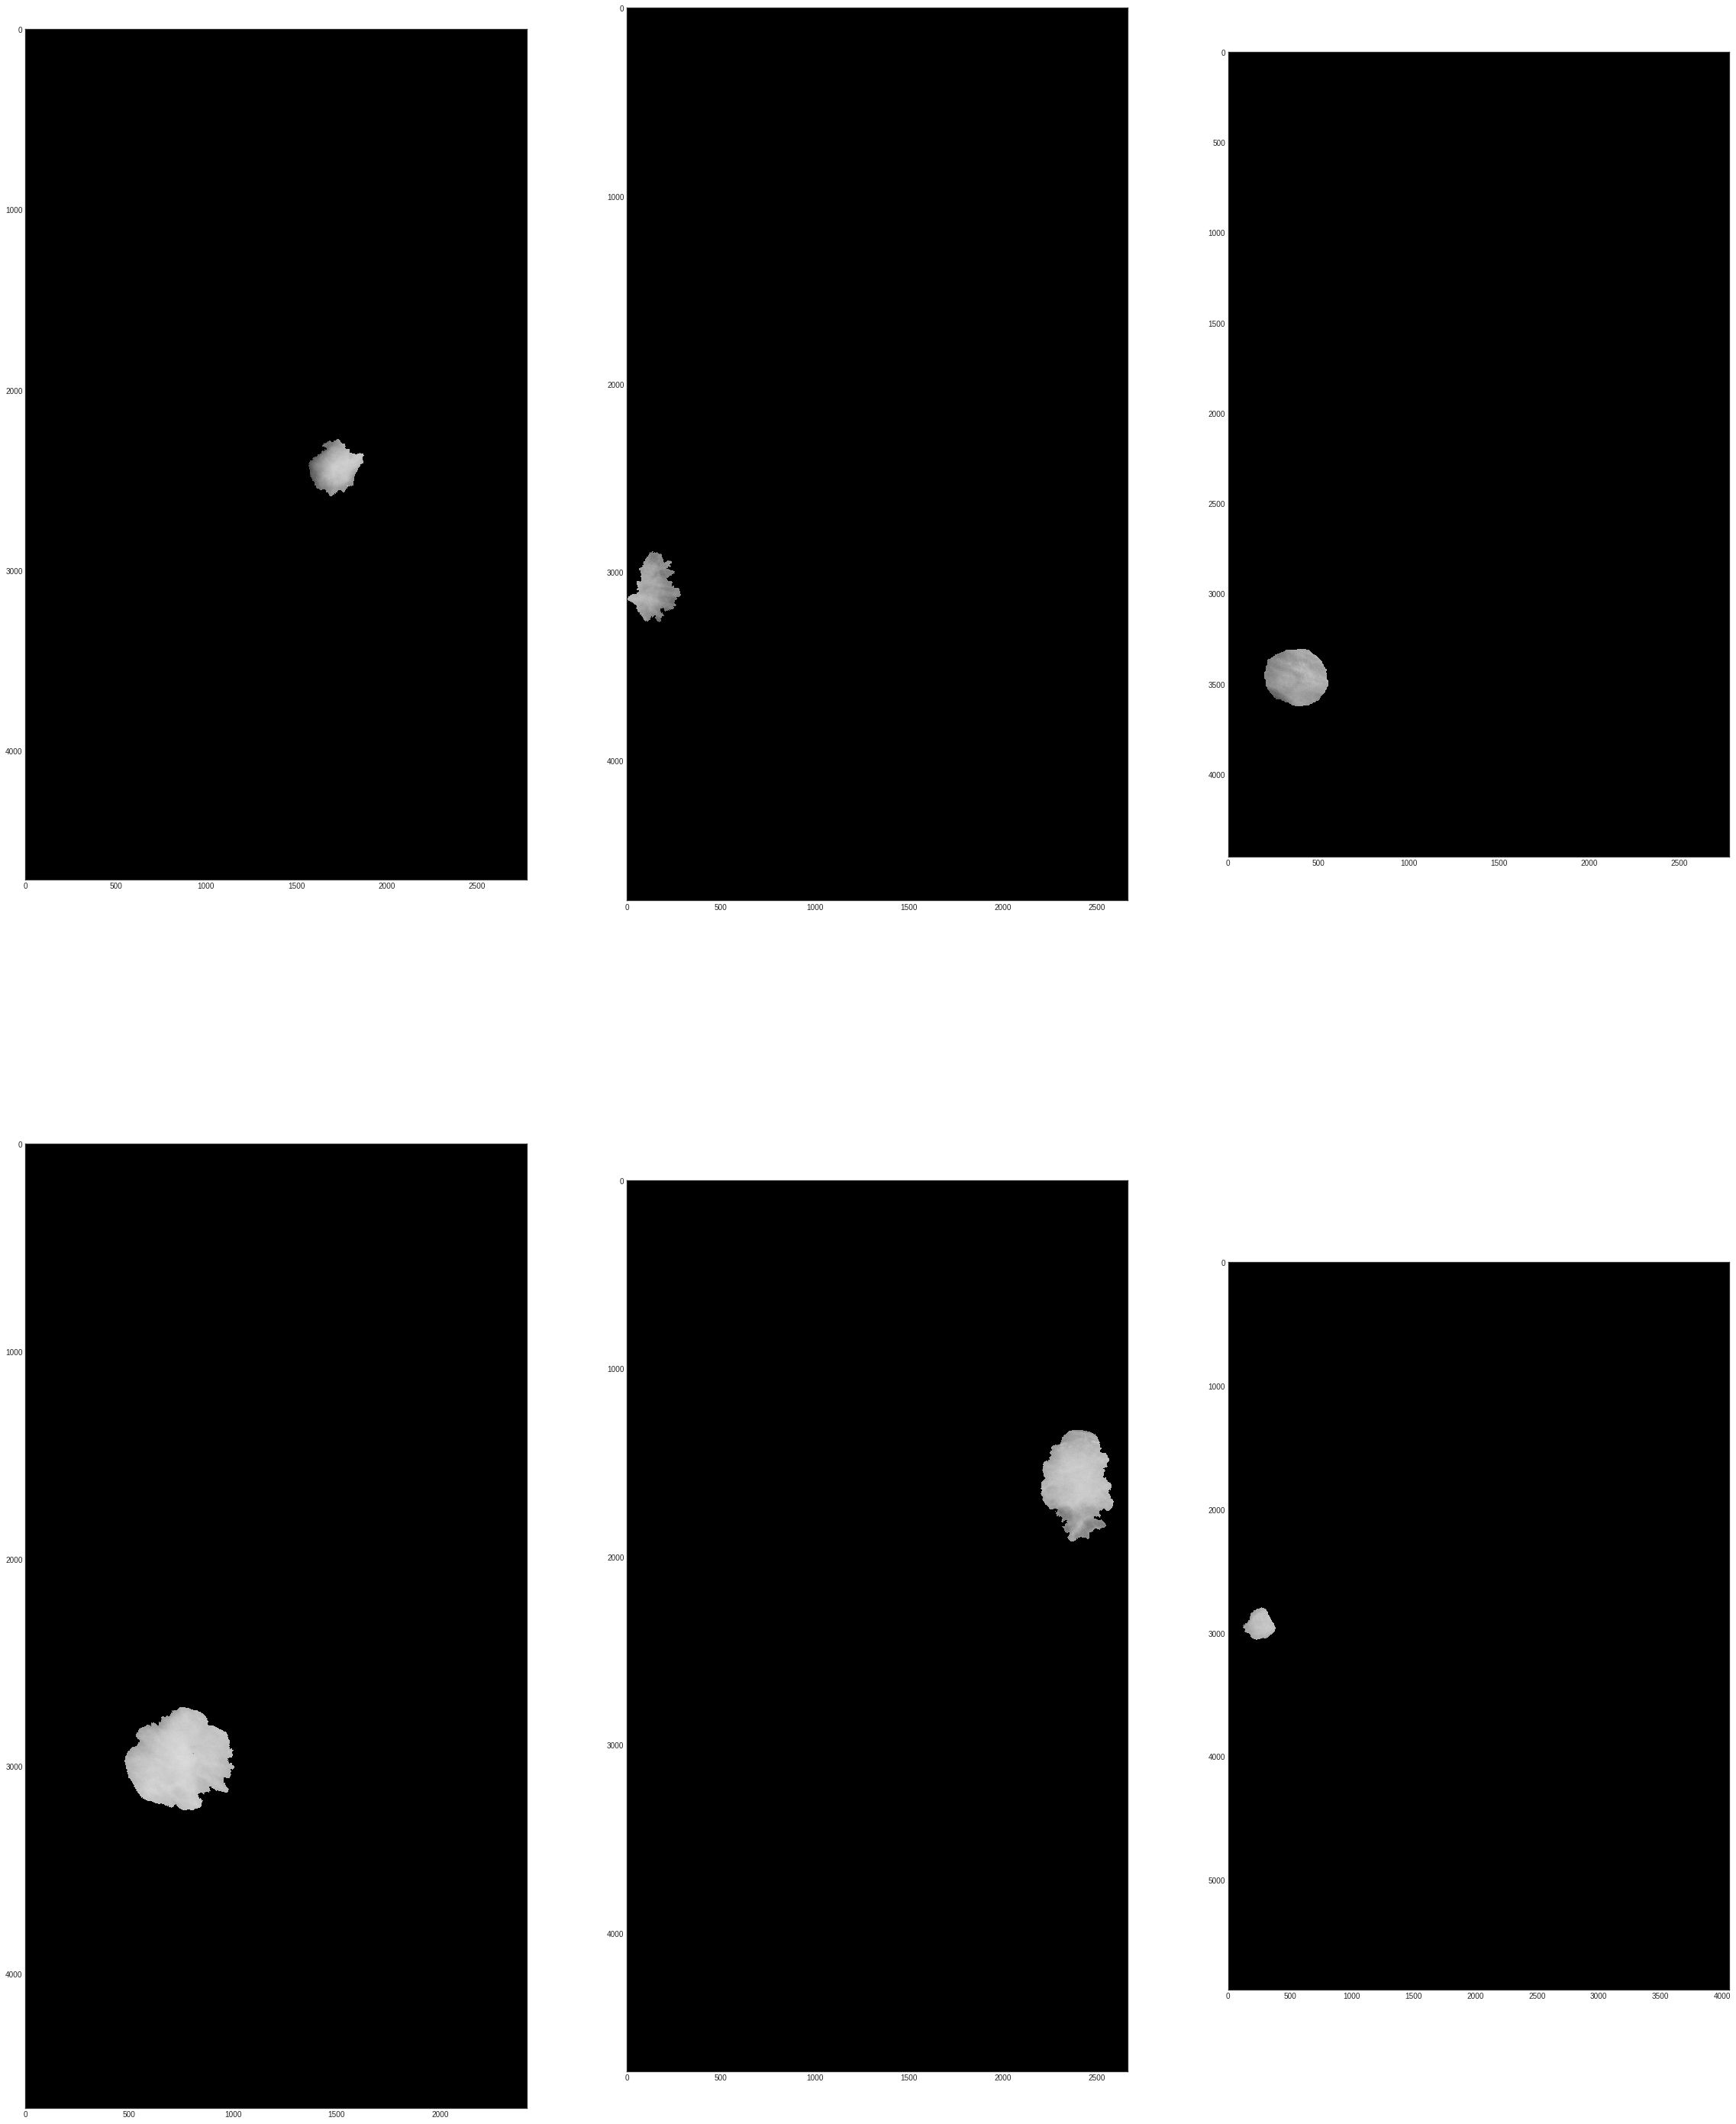

In [14]:
data_folder = "/media/krzysztof/ADATA_HD700/Breast_cancer_PNG/CBIS-DDSM"
plt.figure(figsize=(40, 80))
columns = 3
i = 0
for _, case in sample_cases_malignant.iterrows():
    full_img_path = os.path.join(data_folder, case["image file path"])
    mask_path = os.path.join(data_folder, case["ROI malignant path"])
    
    full_img = cv2.imread(full_img_path)
    mask = cv2.imread(mask_path, 0)
    
    masked_full_img = cv2.bitwise_and(full_img, full_img, mask=mask)
    
    plt.subplot(len(sample_cases_malignant)/columns+1, columns, i + 1)
    masked_full_img = np.array(masked_full_img).astype(np.uint8)
    plt.imshow(masked_full_img)
    i+=1

### Mask as contour

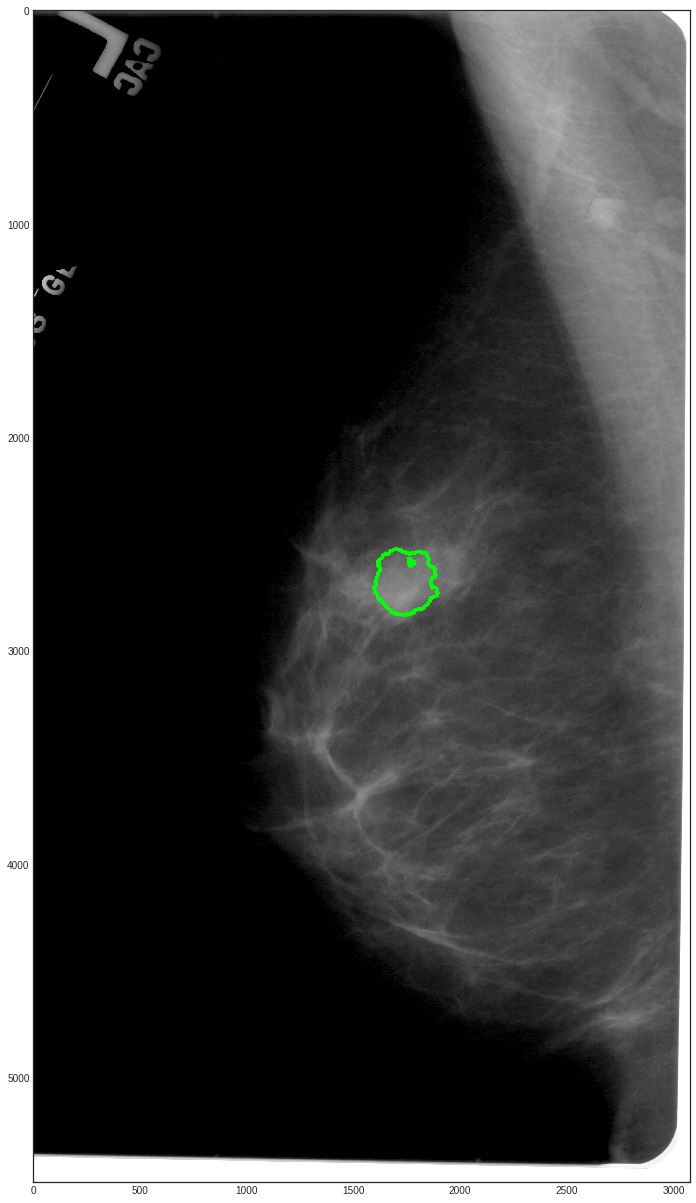

In [8]:
sample_cases_benign = all_metadata_with_masks[all_metadata_with_masks["pathology"]==0].sample(1)
sample_cases_malignant = all_metadata_with_masks[all_metadata_with_masks["pathology"]==1].sample(1)
data_folder = "/media/krzysztof/ADATA_HD700/Breast_cancer_PNG/CBIS-DDSM"
plt.figure(figsize=(40, 80))
columns = 3
i = 0
#---------------------------------------------------------
#TODO: ONLY FOR TESTING !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#---------------------------------------------------------

sample_case = all_metadata_with_masks[all_metadata_with_masks["image file path"].str.split("/", expand=True)[0].astype(str)=="Mass-Training_P_01194_LEFT_MLO"]

#for _, case in sample_cases_malignant.iterrows():
for _, case in sample_case.iterrows():
    full_img_path = os.path.join(data_folder, case["image file path"])
    mask_path_malignant = os.path.join(data_folder, case["ROI malignant path"])
    mask_path_benign = os.path.join(data_folder, case["ROI benign path"])
    
    full_img = cv2.imread(full_img_path)
    mask_malignant = cv2.imread(mask_path_malignant, 0)
    mask_benign = cv2.imread(mask_path_benign, 0)
    
    ret_malignant, thresh_malignant = cv2.threshold(mask_malignant, 1, 255, 0)
    contours_malignant, hierarchy_malignant = cv2.findContours(thresh_malignant, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    ret_benign, thresh_benign = cv2.threshold(mask_benign, 1, 255, 0)
    contours_benign, hierarchy_benign = cv2.findContours(thresh_benign, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    cv2.drawContours(full_img, contours_malignant, -1, (255,0,0), 15)
    cv2.drawContours(full_img, contours_benign, -1, (0,255,0), 15)
    
    plt.subplot(len(sample_cases_malignant)/columns+1, columns, i + 1)
    plt.imshow(full_img)
    i+=1